## **About data
+ The dataset contains transactions made by credit cards in September 2013 by European cardholders.

+ This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

+ It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

+ Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 

+ Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## **Problem Statement : 
+ To develop an ML classification Model to help credit card companies to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Important libraries</p>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.stats import skew
from sklearn import preprocessing
import scipy.stats
from scipy.stats import chi2
from termcolor import colored, cprint
from scipy.stats import pearsonr

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, classification_report
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier ,BaggingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from numpy import mean,std
import xgboost as xgb
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.base import BaseEstimator,clone,TransformerMixin,RegressorMixin

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,RandomizedSearchCV,GridSearchCV
from pprint import pprint
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Stop warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\Ravi\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">1. Importing the Dataset</p>

In [2]:
Data = pd.read_csv("D:\IME672 Data Mining\Project1\creditcard.csv\creditcard.csv")

# 1.1 Header information of Data

In [3]:
Data.shape

(284807, 31)

+ Dataset contains total 31 columns including 1 dependent and the 30 independent columns
+ Total 284807 rows are in the dataset, each row entity is corresponding to specific transaction 

In [4]:
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


+ The data has a column called 'Time', which are seconds from which the very first data observation took place. Let's convert that to hours of a day

In [5]:
Data['Time'] = Data['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,1.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


+ This is structured data as it is in the form of tabular format

# 1.2 Checking missing data 

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 1.3 Target Variable 

In [7]:
attributes = Data.keys()
attributes[-1]

'Class'

# 1.4 Attributes 

In [8]:
attributes[:-1]

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

# 1.5 Visualizing Time and Transactioned amount

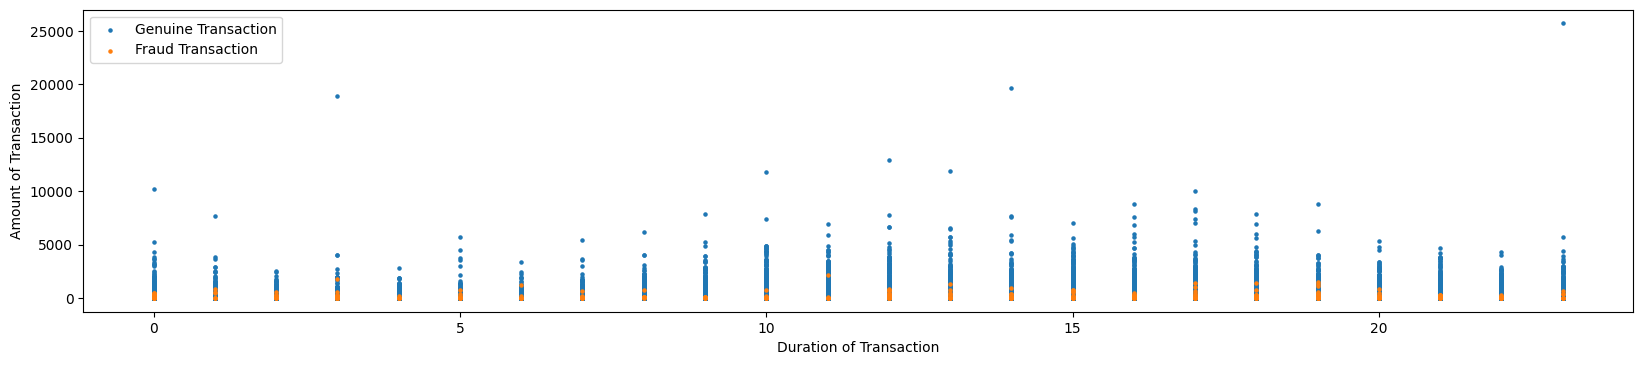

In [9]:
Mask1 = (Data['Class']==1)
Mask2 = (Data['Class']==0)
Data1 = Data[Mask1]
Data2 = Data[Mask2]

plt.figure(figsize=(20,4),dpi=100)
plt.scatter(Data2['Time'],Data2['Amount'],s=5,label='Genuine Transaction')
plt.scatter(Data1['Time'],Data1['Amount'],s=5,label='Fraud Transaction')
plt.xlabel('Duration of Transaction')
plt.ylabel('Amount of Transaction')
plt.legend()

+ All Fraud cases are in the low dollar values i.e. Amount.

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">2. Data Cleaning</p>

# 2.1 Removing duplicated values

+ This can create redundancy in the data
+ Checking and removing duplicate Values

In [10]:
Data.duplicated().sum()

3883

+ There is total 3883 duplicated data

In [11]:
Data = Data.drop_duplicates()
Data.duplicated().sum()

0

# 2.2 Dealing with Missing Data

In [12]:
Data.isna().sum().sum()

0

+ Fortunately there are no missing values present in the data

# 2.3 Visualization of the data

## **Histogram Plot

In [13]:
def Histogramplot(df,norm):
    bins = np.arange(df['Time'].min(),df['Time'].max()+2)
    plt.figure(figsize=(15,4))
    sns.distplot(df[df['Class']==0.0]['Time'],
                 norm_hist=norm,
                 bins=bins,
                 kde=False,
                 color='b',
                 hist_kws={'alpha':.5},
                 label='Genuine')
    sns.distplot(df[df['Class']==1.0]['Time'],
                 norm_hist=norm,
                 bins=bins,
                 kde=False,
                 color='r',
                 label='Fraud',
                 hist_kws={'alpha':.5})
    plt.xticks(range(0,24))
    plt.legend()
    plt.show()

Normalized histogram of Genuine/Fraud Transactions over hour of the day: 


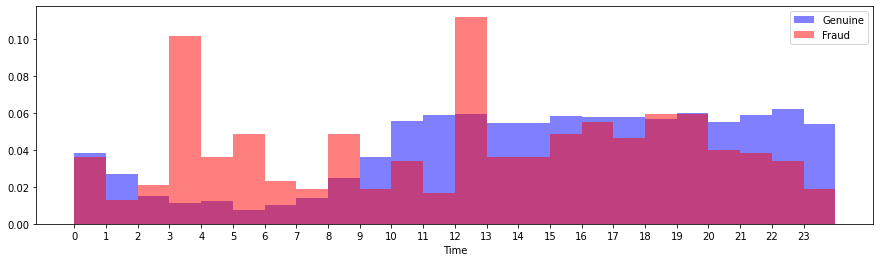

In [14]:
print('Normalized histogram of Genuine/Fraud Transactions over hour of the day: ')
Histogramplot(Data,True)

Counts histogram of Genuine/Fraud Transactions over hour of the day


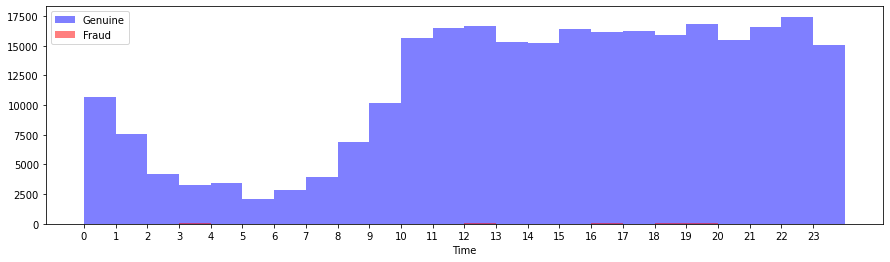

We can barely see the Fraud cases since there are so little of them.


In [15]:
print('Counts histogram of Genuine/Fraud Transactions over hour of the day')
Histogramplot(Data,False)
print('We can barely see the Fraud cases since there are so little of them.')

In [16]:
df = Data.pivot_table(values='Amount',index='Time',columns='Class',aggfunc='count')
df

Class,0,1
Time,,
0.0,10717,17
1.0,7530,6
2.0,4171,10
3.0,3230,48
4.0,3396,17
5.0,2125,23
6.0,2842,11
7.0,3923,9
8.0,6932,23


+ We can see that the maximum fraud transactions occured in day time

In [17]:
FDT = Data['Class'].value_counts()[1]/float(Data['Class'].value_counts()[0])*100

In [18]:
print('Fraud Transaction is {}% of all data.'.format(np.round(FDT,2)))

Fraud Transaction is 0.17% of all data.


+ We also have a HUGE class imbalance. 

## ** Violin plot

In [19]:
Data['Amount'] = StandardScaler().fit_transform(Data[['Amount']])

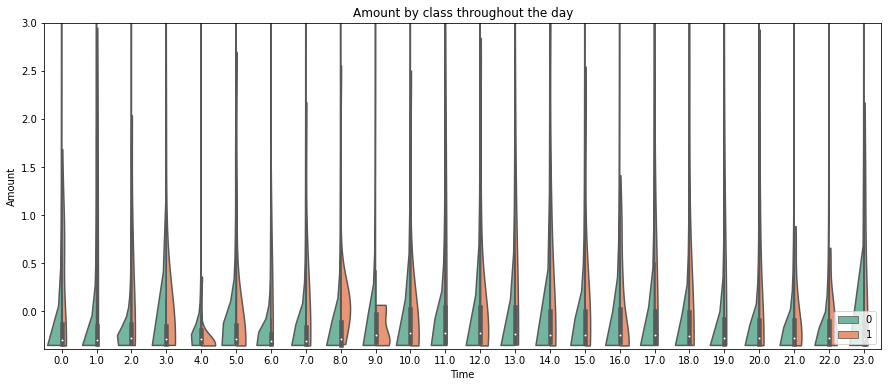

In [20]:
def PlotViolins(minHour,maxHour):
    plt.figure(figsize=(15,6))
    plt.title('Amount by class throughout the day')
    plt.ylim([-0.39,3.0])
    sns.violinplot(data=Data[Data['Time'].isin(range(minHour,maxHour+1))],x='Time',y='Amount',hue='Class',split=True,palette='Set2',cut=0)
    plt.legend(loc='lower right')
    plt.show()
PlotViolins(0,23)

# 2.4 Outlier detection and its removal

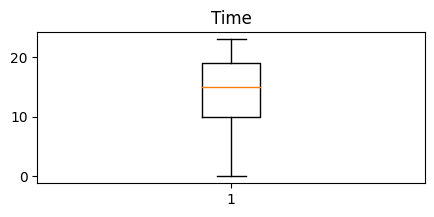

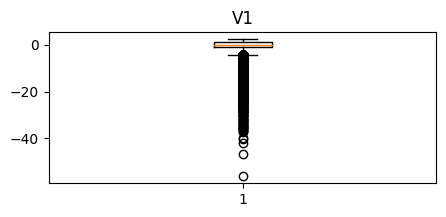

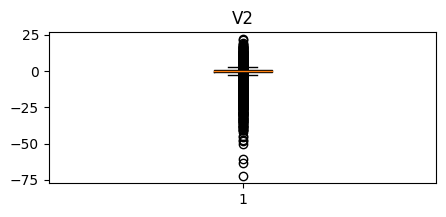

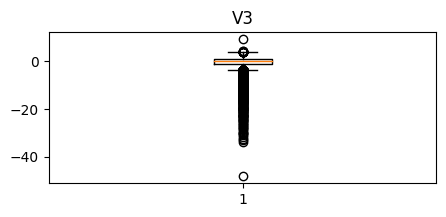

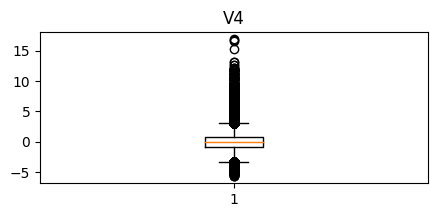

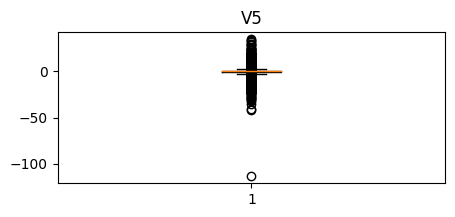

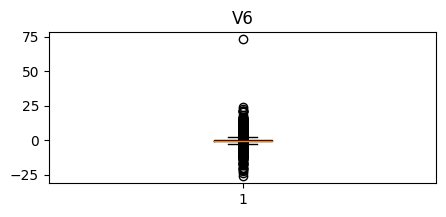

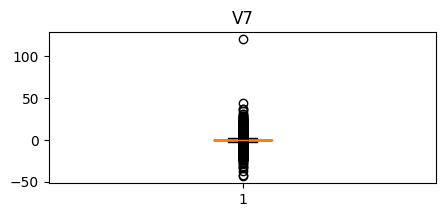

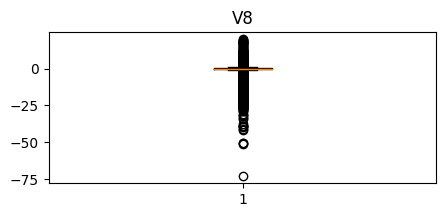

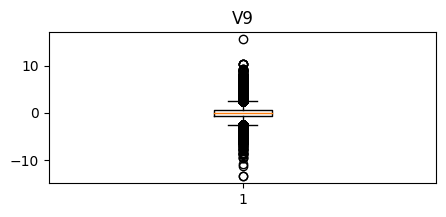

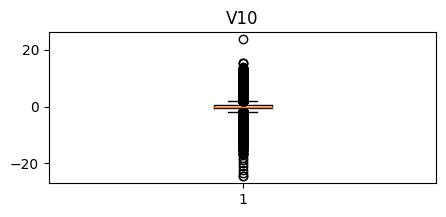

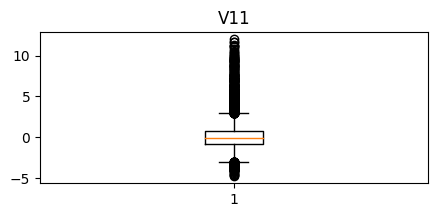

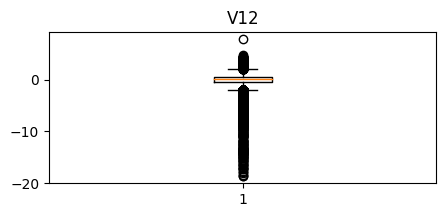

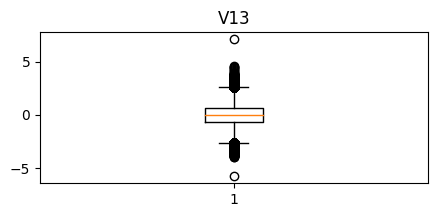

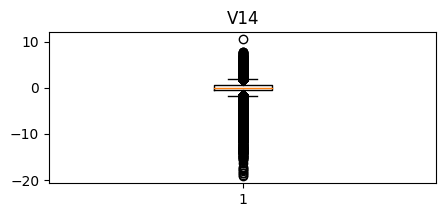

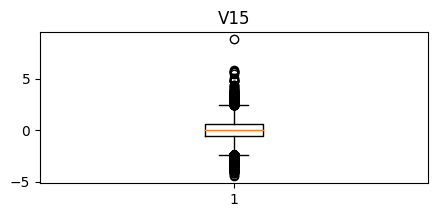

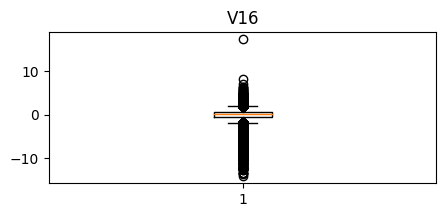

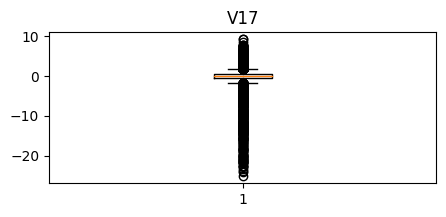

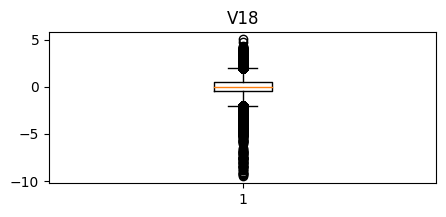

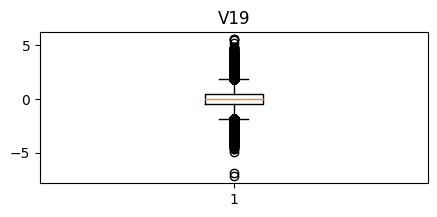

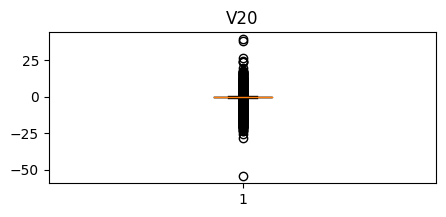

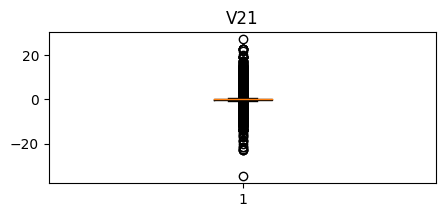

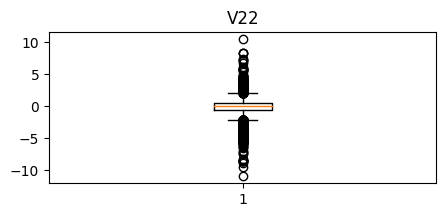

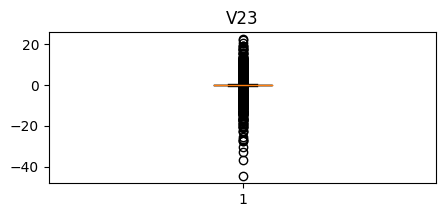

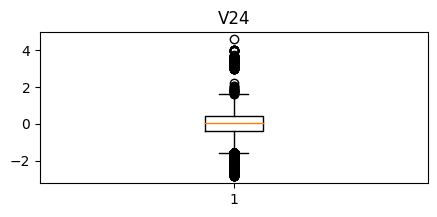

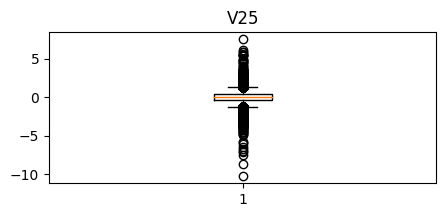

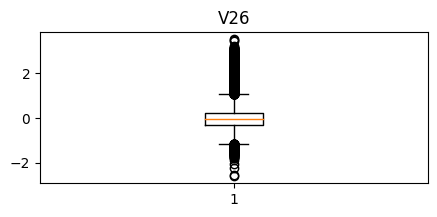

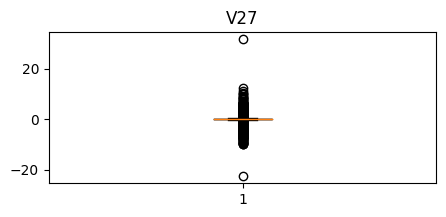

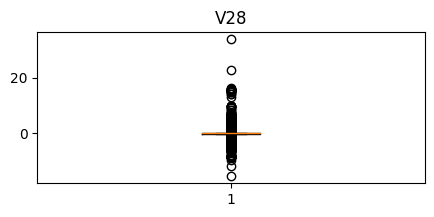

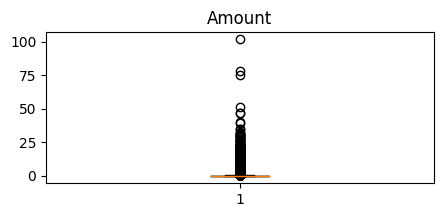

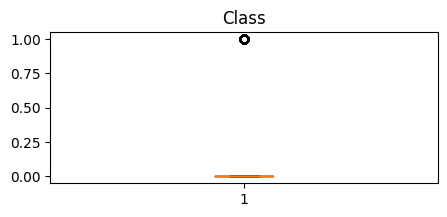

In [21]:
for i in range(len(attributes)):
    col = attributes[i]
    plt.figure(figsize=(5,2),dpi=100)
    plt.boxplot(Data[col]) 
    plt.title(col)

+ Here the outliers are important thing. We can't remove it or replace it. Because here the more important value in the target class is fraud transaction which mostly dependent on the outliers.

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">3. Data Reduction</p>

# 3.1 By correlation
+ Remove the most correlated data attributes
+ Correlation using Pearson Coefficient

<AxesSubplot: >

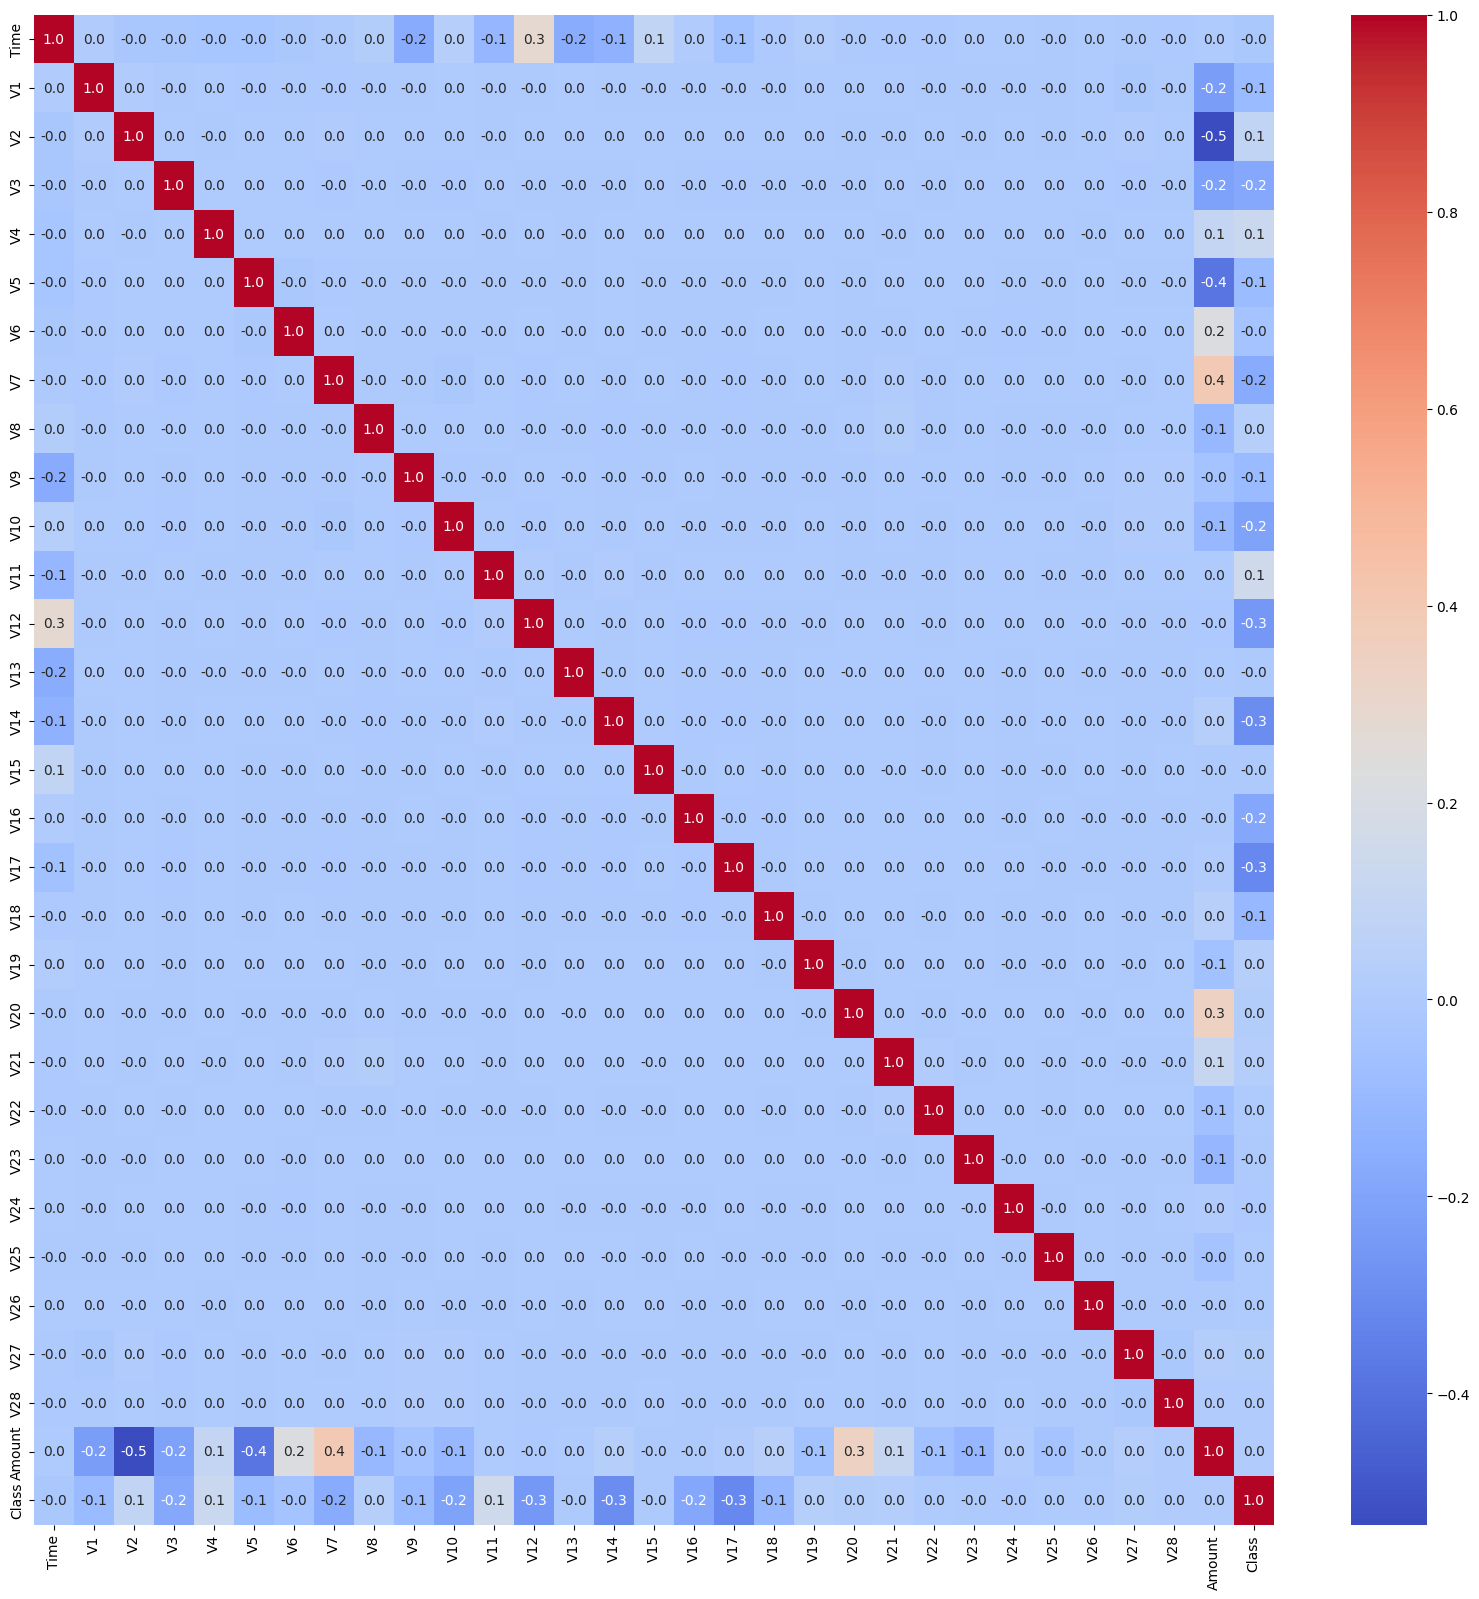

In [22]:
plt.figure(figsize=(20,20),dpi=100)
sns.heatmap(Data.corr(),cmap='coolwarm',fmt=".1f",annot=True)

In [23]:
Keys = Data.keys()
for i in range(len(Keys)):
    for j in range(len(Keys)):
        corr, _ = pearsonr(Data[Keys[i]], Data[Keys[j]])
        if i != j:
            if (corr)>0.7:
                print(f'Attributes {Keys[i]} and {Keys[j]} both are duplicated with the {corr}')

+ Here all attributes are uncorrelated and of equal importance so we can't remove any of them.

# 3.2 By PCA

### **Step I : Feature Scaling 
+ Transforming the data values of all the attributes on single scale.

In [24]:
df = Data.drop(['Class'],axis = 1)
scaler = StandardScaler()
scaler.fit(df)
scaled_ds = pd.DataFrame(scaler.transform(df),columns= df.columns )
scaled_ds

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.273538,-0.692561,-0.042419,1.675954,0.973883,-0.243541,0.355292,0.190582,0.086015,0.340541,...,0.323516,-0.025227,0.382678,-0.176226,0.114730,0.251012,-0.394712,0.331644,-0.065867,0.240849
1,-2.273538,0.615279,0.162570,0.104457,0.317510,0.045799,-0.056025,-0.067881,0.074530,-0.225358,...,-0.091034,-0.310550,-0.880534,0.161819,-0.557468,0.325017,0.259141,-0.026849,0.042679,-0.344135
2,-2.112711,-0.691817,-0.808945,1.169905,0.269253,-0.363302,1.365644,0.638556,0.211857,-1.376171,...,0.677367,0.341011,1.063333,1.451865,-1.134910,-0.622893,-0.290891,-0.143469,-0.183277,1.152744
3,-2.112711,-0.490857,-0.110427,1.183025,-0.608078,-0.005284,0.947874,0.188967,0.321466,-1.259529,...,-0.270767,-0.148992,0.007007,-0.303689,-1.938515,1.244946,-0.462823,0.153492,0.184466,0.136855
4,-2.112711,-0.589246,0.532463,1.021042,0.285665,-0.293568,0.078589,0.477407,-0.225875,0.755410,...,0.526759,-0.013020,1.099994,-0.219302,0.237575,-0.389883,1.040415,0.547592,0.650769,-0.076189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280919,-2.273538,-6.085196,6.093116,-6.527543,-1.457385,-3.894373,-1.962152,-3.996275,6.173482,1.757676,...,1.907258,0.293504,0.153918,1.619589,-0.837571,2.757257,0.516813,2.369033,2.497157,-0.351780
280920,-2.273538,-0.371187,-0.031714,1.343523,-0.520066,0.632858,0.805328,0.015837,0.251721,0.542526,...,0.075434,0.294537,1.273802,0.020024,-1.675188,-1.157339,-0.822589,0.167952,-0.164392,-0.256147
280921,-2.273538,0.988261,-0.180602,-2.160827,-0.392489,1.912925,2.294941,-0.244861,0.601047,0.403296,...,0.000129,0.319071,0.796703,-0.059736,1.061956,0.513857,-0.183525,0.006947,-0.082577,-0.084589
280922,-2.273538,-0.118837,0.322441,0.459908,0.488057,-0.272334,0.477098,-0.560919,0.576321,0.366405,...,0.163154,0.364730,1.102434,-0.260552,0.207728,-1.085567,1.132525,0.269428,0.315153,-0.315032


### **Step II : Initiating PCA to reduce dimentions features to 3

In [25]:
pca = PCA(n_components = 3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["PC1","PC2","PC3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,280924.0,6.879712e-18,1.402986,-8.852580,-0.450735,-0.355938,-0.050128,134.040477
PC2,280924.0,-9.065032e-17,1.188068,-5.238772,-0.767357,-0.262403,0.264666,7.536857
PC3,280924.0,-1.054721e-17,1.007394,-43.715247,-0.478166,-0.095807,0.360673,119.446202


### **Step III : A 3-D projection of dataset in the reduced dimension

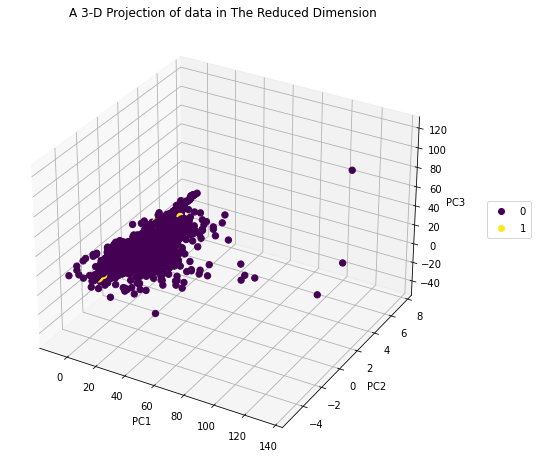

In [26]:
x = PCA_ds["PC1"]
y = PCA_ds["PC2"]
z = PCA_ds["PC3"]

fig = plt.figure(figsize = (6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
cmap = 'viridis'
sc = ax.scatter(x, y, z, s=40, c=Data['Class'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title(f'''A 3-D Projection of data in The Reduced Dimension''')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.1,0.6), loc=2)

# 3.2.1 PCA function on the attributes 

+ All the 30 attribute columns taken first
+ Then started reducing the attribute by one in every step
+ Applying PCA in every steps
+ Visualizing the variations in 3D of all the 3 PC's

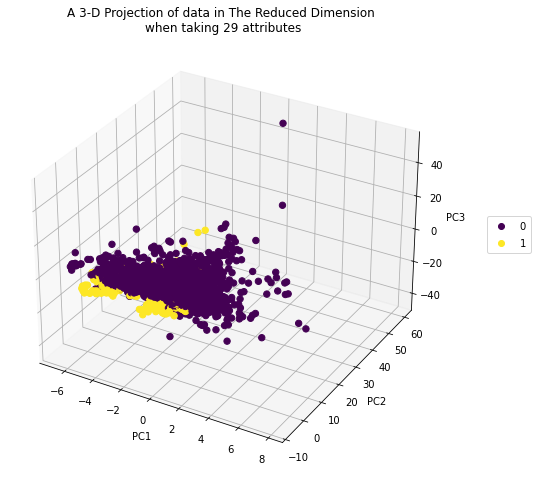

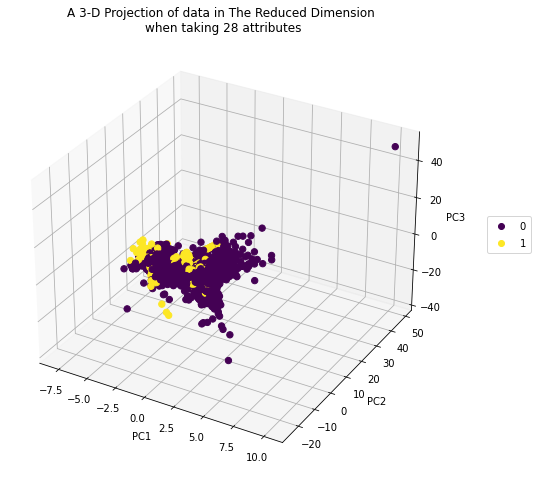

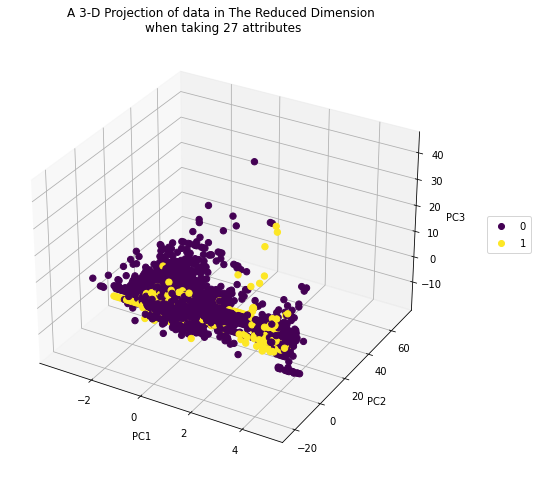

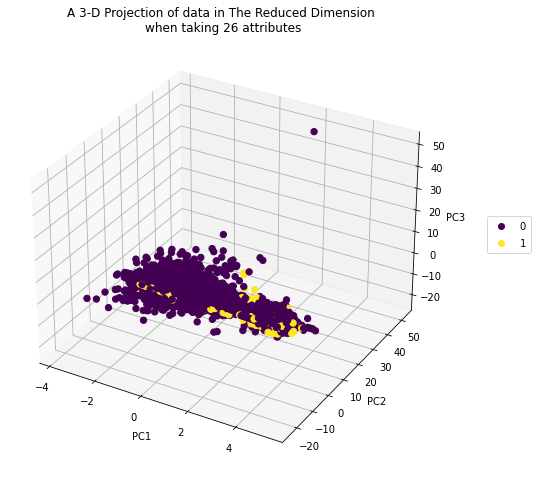

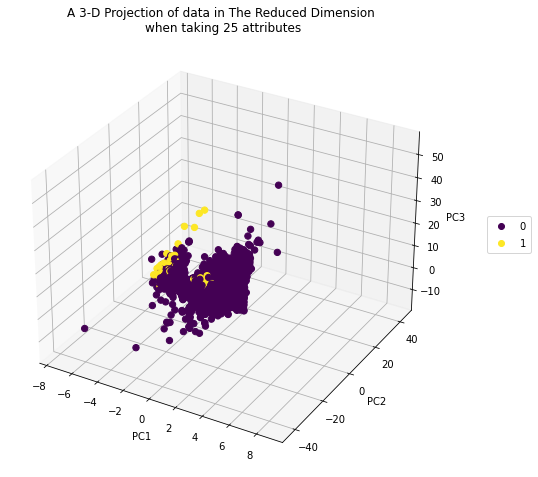

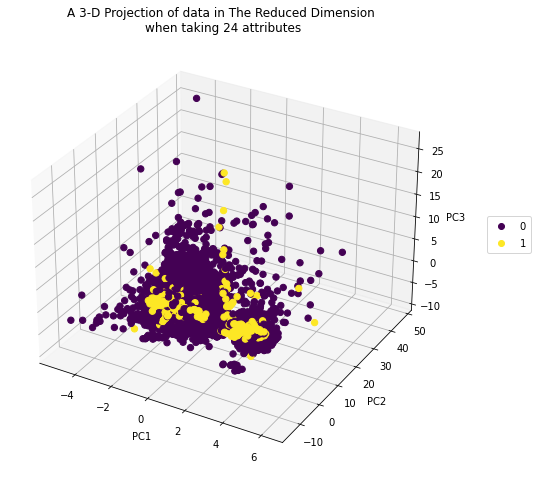

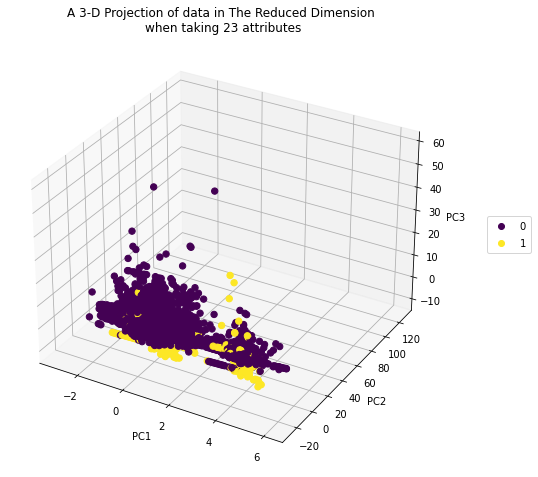

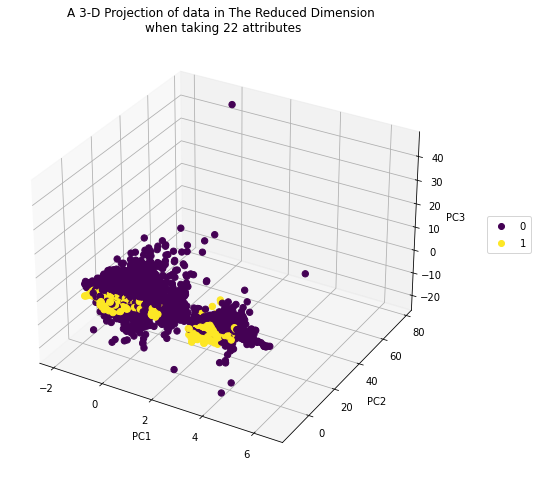

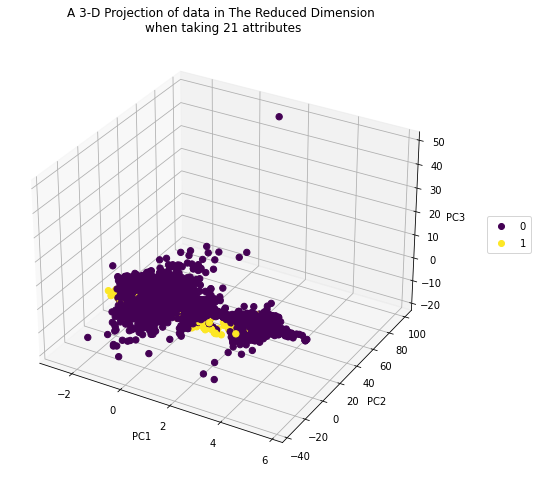

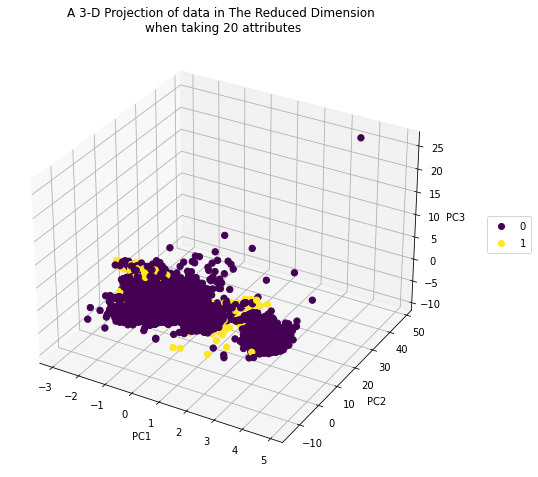

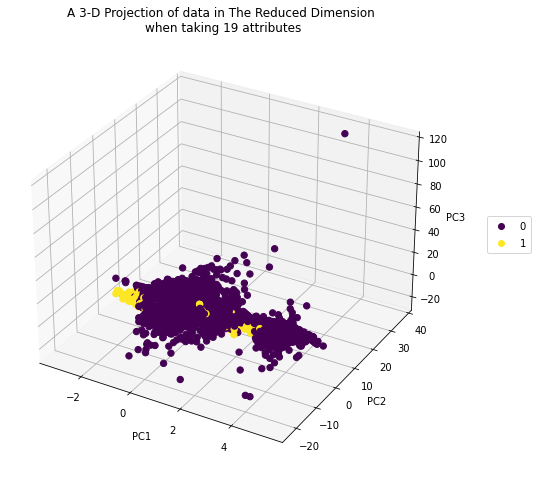

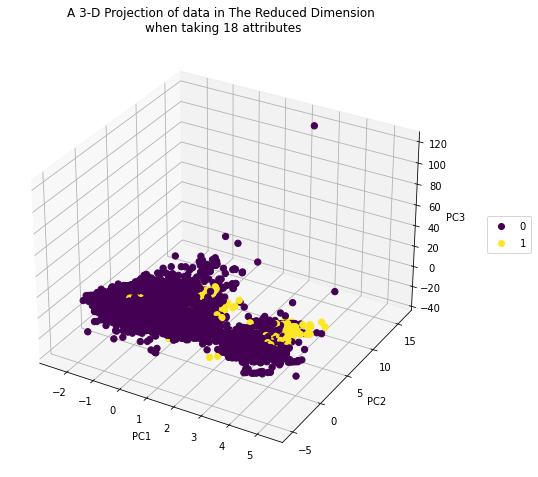

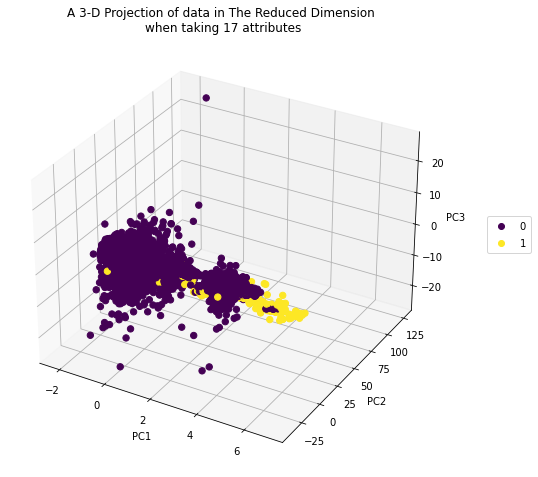

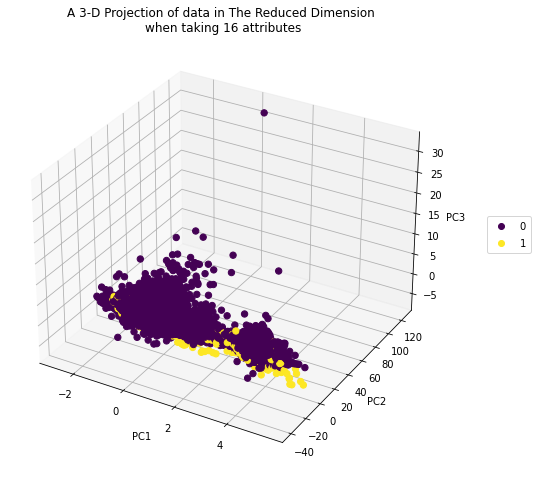

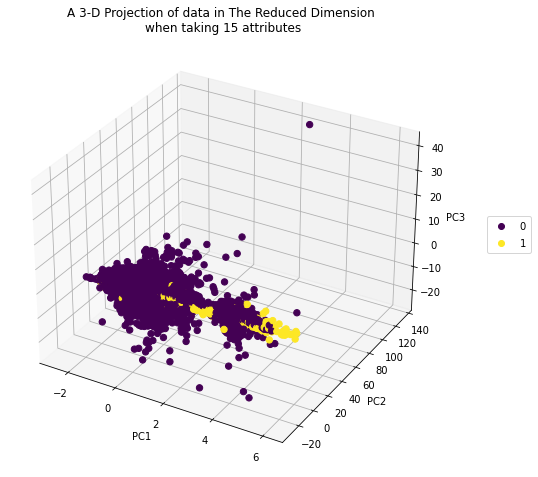

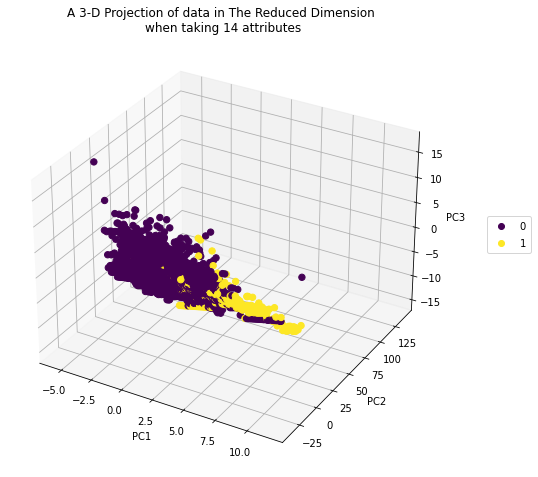

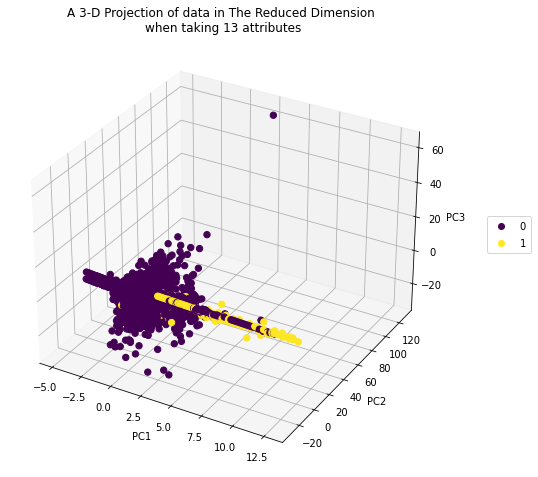

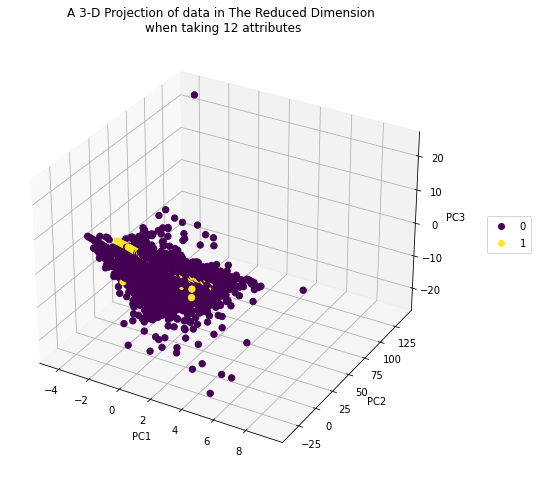

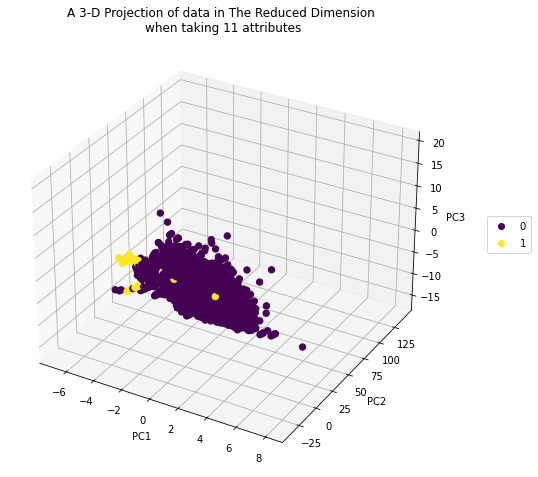

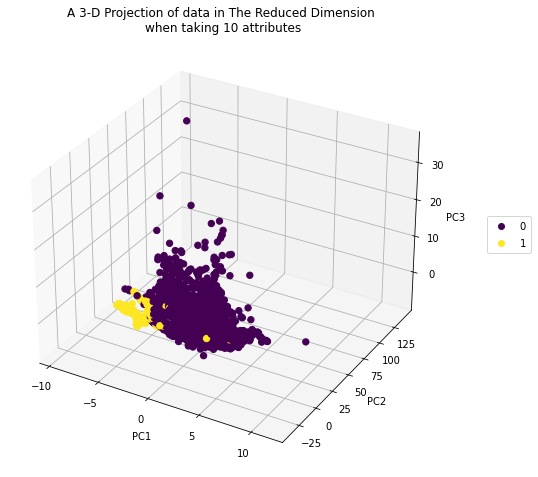

In [27]:
scaled_df = scaled_ds.copy()
for i in range(20):
    V_f = scaled_df.keys()
    n = len(V_f)
    scaled_df = scaled_df.drop([f'{V_f[n-1]}'],axis = 1)
    pca = PCA(n_components = 3)
    pca.fit(scaled_df)
    PCA_ds = pd.DataFrame(pca.transform(scaled_df), columns=(["PC1","PC2","PC3"]))
    PCA_ds.describe().T

    x = PCA_ds["PC1"]
    y = PCA_ds["PC2"]
    z = PCA_ds["PC3"]
    
    fig = plt.figure(figsize = (6,6))
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    cmap = 'viridis'
    sc = ax.scatter(x, y, z, s=40, c=Data['Class'], marker='o', cmap=cmap, alpha=1)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(f'''A 3-D Projection of data in The Reduced Dimension 
when taking {n-1} attributes''')
    plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.1,0.6), loc=2)

## **Here we can see that all the PCs are of equal variance 

Text(0, 0.5, 'Explained Variance')

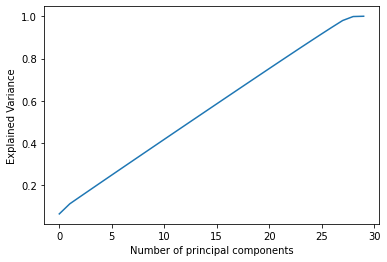

In [28]:
PCA_30 = PCA(n_components = 30,random_state = 2)
PCA_30.fit(scaled_ds)
PCA_30_ = PCA_30.transform(scaled_ds)

plt.plot(np.cumsum(PCA_30.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Explained Variance')

In [29]:
np.sum(PCA_30.explained_variance_ratio_),PCA_30.explained_variance_ratio_ 

(0.9999999999999999,
 array([0.06564763, 0.04776298, 0.03418642, 0.03404103, 0.03397413,
        0.0338514 , 0.03380804, 0.03376757, 0.03371453, 0.03369134,
        0.03366479, 0.03362574, 0.03356986, 0.03354103, 0.03349559,
        0.03347985, 0.03344682, 0.03340357, 0.03335227, 0.0332979 ,
        0.03326609, 0.03314559, 0.03298704, 0.03294597, 0.03262049,
        0.03238369, 0.03201298, 0.03112995, 0.01878941, 0.00139633]))

## **Note : 
+ Here we can see the trend between the information retained and the number of attributes retained.
+ All the attributes are equally important explaining very less variance to the data

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">4. Data Transformation by normalization</p>

# **Min-max normalization of the data

In [30]:
def Min_Max_Normalization(attribute,df,New_min,New_max):
    min_ = np.min(df[f'{attribute}'])
    max_ = np.max(df[f'{attribute}'])
    v = df[f'{attribute}']
    h = New_max - New_min
    min_maxN = ((v - min_) / (max_ - min_))*h + New_min
    return min_maxN

In [31]:
New_min = 0
New_max = 1
dataset_N1 = Data.copy()
for i in range(len(attributes)):
    N = Min_Max_Normalization(attributes[i],Data,New_min,New_max)
    dataset_N1[attributes[i]] = N

In [32]:
dataset_N1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.043478,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.043478,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.043478,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.000000,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0.0
284803,0.000000,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,...,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0.0
284804,0.000000,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,...,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0.0
284805,0.000000,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0.0


+ We will use the normalized data in the model building

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">5. Taking care of the Class Imbalance of the Training Dataset</p>

In [34]:
#sns.pairplot(Data,hue='Class')

# 5.1 Target Variable

In [35]:
Target_Variable = Data['Class']
Target_Variable.value_counts()

0    280451
1       473
Name: Class, dtype: int64

+ Imbalanced datasets are those where there is a severe skew in the class distribution in the minority class to the majority class.
+ Here we can see there is Class Imbalance in the Data, Genuine : Fraud = 600:1
+ Model will be trained well for the Genuine class as more datasets are available in this class
+ Model will be trained not so well for the Fraud class as less datasets are available in this class

In [36]:
Data_featuresf = dataset_N1.iloc[:,:-1]
Target_Varf    = dataset_N1.iloc[:,-1]

## **UnderSampling

In [37]:
rus1  = RandomUnderSampler(random_state=0)
X_res_U, y_res_U = rus1.fit_resample(Data_featuresf,Target_Varf)
y_res_U.value_counts()

0.0    473
1.0    473
Name: Class, dtype: int64

## **Oversampling : 
+ Resamples the Fraud tuples so that the resulting training set contains an equal number of Genuine and Fraud tuples.
+ Random oversampling duplicates the minority class in the training dataset and can result in overfitting for some models. 

In [38]:
rus2  = RandomOverSampler(random_state=0)
X_res_O, y_res_O = rus2.fit_resample(Data_featuresf,Target_Varf)
y_res_O.value_counts()

0.0    280451
1.0    280451
Name: Class, dtype: int64

# 5.2 Splitting the dataset into the Training set and Test set

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X_res_U, y_res_U,test_size=0.3,random_state=0)

## **SMOTE

In [40]:
from imblearn.combine import SMOTETomek
rus3  = SMOTETomek(random_state=0)
X_train,y_train = rus3.fit_resample(X_train,y_train)

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">6. Building the Separate Models</p>

In [41]:
def Confusion_Matrix(C_M):
    group_names  = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ['{0:0.0f}'.format(value) for value in C_M.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in C_M.flatten()/np.sum(C_M)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(C_M, annot=labels, fmt='', cmap='coolwarm')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels') 
    plt.title('Confusion Matrix')

In [42]:
def Evaluation_of_classifier(y_train, X_train_predicted):
    print('Accuracy :',100*np.round(accuracy_score(y_train, X_train_predicted),2),'%')
    print('Error Rate :',100-100*np.round(accuracy_score(y_train, X_train_predicted),2),'%')
    print('Recall or Sensitivity :',100*recall_score(y_train, X_train_predicted),'%')
    print('Precision :',100*precision_score(y_train, X_train_predicted),'%')
    print('F1 Score :',100*f1_score(y_train, X_train_predicted),'%')

# Logistic Regression Classifier

In [43]:
Model_LG = LogisticRegression()
Model_LG.fit(X_train,y_train)

LogisticRegression()


Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       146
         1.0       1.00      0.83      0.91       138

    accuracy                           0.92       284
   macro avg       0.93      0.92      0.92       284
weighted avg       0.93      0.92      0.92       284

Accuracy : 92.0 %
Error Rate : 8.0 %
Recall or Sensitivity : 83.33333333333334 %
Precision : 100.0 %
F1 Score : 90.9090909090909 %


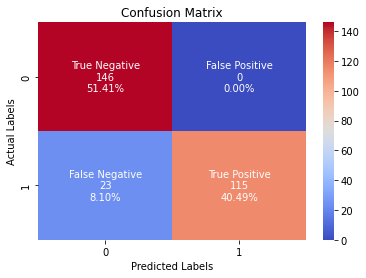

In [44]:
y_predt = Model_LG.predict(X_test)
C_M = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M) 
print('\nClassification Report:\n',classification_report(y_test,y_predt))
Evaluation_of_classifier(y_test, y_predt)

In [45]:
Model_LG = LogisticRegression(solver='saga')
Model_LG.fit(X_train,y_train)

LogisticRegression(solver='saga')


Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       146
         1.0       1.00      0.83      0.91       138

    accuracy                           0.92       284
   macro avg       0.93      0.92      0.92       284
weighted avg       0.93      0.92      0.92       284

Accuracy : 92.0 %
Error Rate : 8.0 %
Recall or Sensitivity : 83.33333333333334 %
Precision : 100.0 %
F1 Score : 90.9090909090909 %


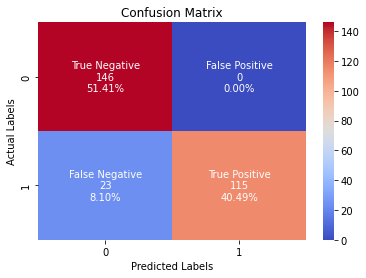

In [46]:
y_predt = Model_LG.predict(X_test)
C_M = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M) 
print('\nClassification Report:\n',classification_report(y_test,y_predt))
Evaluation_of_classifier(y_test, y_predt)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       146
         1.0       0.98      0.91      0.94       138

    accuracy                           0.95       284
   macro avg       0.95      0.95      0.95       284
weighted avg       0.95      0.95      0.95       284

Accuracy : 95.0 %
Error Rate : 5.0 %
Recall or Sensitivity : 90.57971014492753 %
Precision : 98.4251968503937 %
F1 Score : 94.33962264150944 %


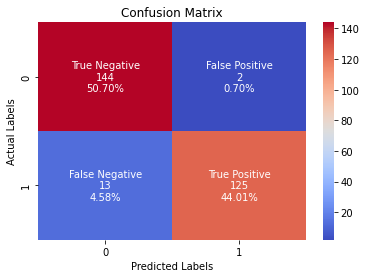

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
X_train1 = poly.fit_transform(X_train)
Model_LG = LogisticRegression(solver='saga')
Model_LG.fit(X_train1,y_train)
X_test1 = poly.transform(X_test)
y_predt = Model_LG.predict(X_test1)
C_M = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M) 
print('\nClassification Report:\n',classification_report(y_test,y_predt))
Evaluation_of_classifier(y_test, y_predt)

## **ROC versus Precision/Recall Curves
+ Just by manaually selecting a range of weights to boost the minority class already helped our model have better recall, and in some cases, better precision also. Recall and Precision are usually trade offs of each other, so when you can improve both at the same time, your model's overall performance is undeniably improved.

+ To illustrate the trade off between precision vs recall, and let's also include False Positive Rate vs True Positive Rate (ROC), let's plot the ROC and Precision/Recall curves for different weights for the minority class.

In [48]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve

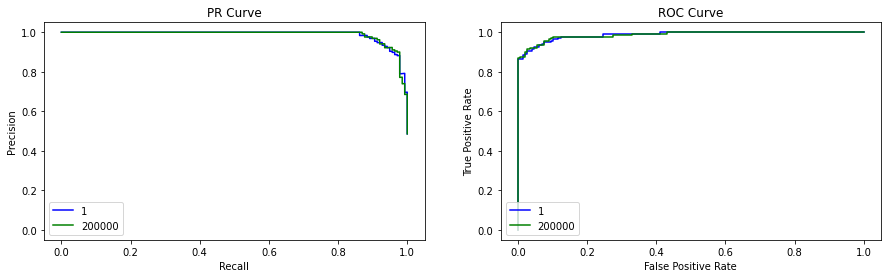

In [49]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

for w,k in zip([1,200000],'bgrcmykw'):
    lr_model = LogisticRegression(class_weight={0:1,1:w})
    lr_model.fit(X_train,y_train)
    pred_prob = lr_model.predict_proba(X_test)[:,1]

    p,r,_ = precision_recall_curve(y_test,pred_prob)
    tpr,fpr,_ = roc_curve(y_test,pred_prob)
    
    ax1.plot(r,p,c=k,label=w)
    ax2.plot(tpr,fpr,c=k,label=w)
ax1.legend(loc='lower left')    
ax2.legend(loc='lower left')

+ With some weights seem to perform better in ROC than in the PR curve.
+ While the blue, w=1, line performed poorly in both charts, the black, w=200000, line performed "well" in the ROC but poorly in the PR curve. 
+ This is due to the high class imbalance in our data. 
+ ROC curve is not a good visual illustration for highly imbalanced data, because the False Positive Rate does not drop drastically when the Total Real Negatives is huge.

+ Whereas Precision is highly sensitive to False Positives and is not impacted by a large total real negative denominator.
+ The biggest difference among the models are at around 0.9 recall rate. Seems like a lower weight, i.e. 1 out performs other weights significantly at 0.9 recall.
+ This means that with those specific weights, our model can detect frauds fairly well (catching 90% of fraud) while not annoying a bunch of customers with false positives with an equally high precision of 90%.

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Deep Learning Model: ANN </p>

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [51]:
model = Sequential()
model.add(Dense(128*8, activation="relu", input_dim=(X_train.shape[1])))
model.add(Dense(128*4, activation="relu"))
model.add(Dense(128*2, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=Adam(lr=1e-4), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), 
          callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-10), EarlyStopping(patience=5, verbose=1)])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              31744     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                5

In [52]:
y_predt = model.predict(X_test)

9/9 [==============================] - 0s 4ms/step



Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       146
         1.0       0.95      0.91      0.93       138

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284

Accuracy : 93.0 %
Error Rate : 7.0 %
Recall or Sensitivity : 91.30434782608695 %
Precision : 94.73684210526315 %
F1 Score : 92.98892988929889 %


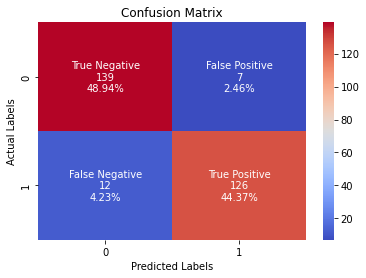

In [54]:
y_predt = np.round(2*(y_predt-np.min(y_predt))/(np.max(y_predt)-np.min(y_predt)))
y_predt = pd.DataFrame(y_predt).replace(to_replace=2,value=1)
y_predt = np.array(y_predt)

C_M     = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M)
print('\nClassification Report:\n',classification_report(y_test,y_predt))
Evaluation_of_classifier(y_test, y_predt)